# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Artificial Intelligence for Robotics. Sections 1-3</span>

##   &#x1F916; &nbsp; <span style="color:red">Links</span>

Stanford University CS 226 Statistical Techniques in Robotics http://cs226.stanford.edu/notes/

Localization Methods for a Mobile Robot in Urban Environments http://www.cs.columbia.edu/~atanas/publications/2004_TRO.pdf

Introduction to Mobile Robotics http://ais.informatik.uni-freiburg.de/teaching/ss11/robotics/slides/09d-ekf-localization.pdf

Markov Localization for Mobile Robots in Dynamic Environments http://www.cs.cmu.edu/afs/cs/project/jair/pub/volume11/fox99a-html/jair-localize.html

Monte Carlo Localization for Mobile Robots http://www.cc.gatech.edu/ai/robot-lab/online-publications/dellaert_frank_1999_2.pdf

Robotics - Localization - Nonparametric Filters http://home.deib.polimi.it/restelli/MyWebSite/pdf/E07_h.pdf

##   &#x1F916; &nbsp; <span style="color:red">Libraries</span>

In [2]:
import struct
import os
import numpy as np
import pandas as pd
import random
import string
import zipfile
from time import time

In [3]:
from IPython.display import display, Image
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib import offsetbox
%matplotlib inline

##   &#x1F916; &nbsp; <span style="color:red">Section 1. Localization Overview</span>

### Notes

### Quizes

In [8]:
# Quiz: Uniform Probability Quiz
1/5.0

0.2

In [3]:
# Quiz: Uniform Probability

# Modify the empty list, p, so that it becomes a UNIFORM probability
# distribution over five grid cells, as expressed in a list of 
# five probabilities.

p=5*[1.0/5] 
print (p)

[0.2, 0.2, 0.2, 0.2, 0.2]


In [4]:
np.repeat(1.0/8,8)

array([ 0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125])

In [5]:
# Quiz: Generalized Uniform Distribution

#  Modify your code to create probability vectors, p, of arbitrary 
#  size, n. Use n=5 to verify that your new solution matches 
#  the previous one.
n=5
p=n*[1.0/n] 
print(p)

[0.2, 0.2, 0.2, 0.2, 0.2]


In [6]:
# Quiz: Probability After Sense
p=[0.2*0.2, 0.2*0.6, 0.2*0.6, 0.2*0.2, 0.2*0.2]
p

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]

In [7]:
# Quiz: Compute Sum
s = sum(p)
s

0.3600000000000001

In [8]:
# Quiz: Normalize Distribution
p=[x/s for x in p]
p

[0.1111111111111111,
 0.3333333333333332,
 0.3333333333333332,
 0.1111111111111111,
 0.1111111111111111]

In [9]:
# Quiz: PHit And PMiss
#Write code that outputs p after multiplying each entry 
#by pHit or pMiss at the appropriate places. Remember that
#the red cells 1 and 2 are hits and the other green cells
#are misses.

n=5
p=n*[1.0/n] 
position=[0,1,1,0,0]
pHit = 0.6
pMiss = 0.2
for i in range(n):
    if position[i]==0: 
        p[i]*=pMiss
    else:
        p[i]*=pHit
p

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]

In [10]:
#Quiz: Sum Of Probabilities

#Modify the program to find and print the sum of all 
#the entries in the list p.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
pHit = 0.6
pMiss = 0.2

p[0]=p[0]*pMiss
p[1]=p[1]*pHit
p[2]=p[2]*pHit
p[3]=p[3]*pMiss
p[4]=p[4]*pMiss

# Enter your code below
print (sum(p))

0.3600000000000001


In [11]:
# Quiz: Sense Function
#Modify the code below so that the function sense, which 
#takes p and Z as inputs, will output the NON-normalized 
#probability distribution, q, after multiplying the entries 
#in p by pHit or pMiss according to the color in the 
#corresponding cell in world.


p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
Z = 'red'
pHit = 0.6
pMiss = 0.2

def sense(p, Z):
    #
    #ADD YOUR CODE HERE
    #
    n=len(p)
    q=n*[1]
    for i in range(n):
        if world[i] == Z:
            q[i]= p[i]*pHit
        else:
            q[i]=p[i]*pMiss
    
    return q

print (sense(p,Z))

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


In [12]:
s

0.3600000000000001

In [13]:
# Variant 2
def sense(p, Z):
    n=len(p)
    hit = [world[i]==Z for i in range(n)]
    q=[p[i]*(hit[i]*pHit+(1-hit[i])*pMiss)  for i in range(n)]
    return q
print (sense(p,Z))

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


In [14]:
# Quiz: Normalized Sense Function
#Modify your code so that it normalizes the output for 
#the function sense. This means that the entries in q 
#should sum to one.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
Z = 'red'
pHit = 0.6
pMiss = 0.2
n=5
hit = [world[i]==Z for i in range(n)]

def sense(p, Z):
    q=[p[i]*(hit[i]*pHit+(1-hit[i])*pMiss)  for i in range(n)]
    q=[q[i]/sum(q) for i in range(n)]
    return q
print (sense(p,Z))


[0.1111111111111111, 0.3333333333333332, 0.3333333333333332, 0.1111111111111111, 0.1111111111111111]


In [15]:
# Quiz: Test Sense Function
#Try using your code with a measurement of 'green' and 
#make sure the resulting probability distribution is correct.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
Z = 'green'
pHit = 0.6
pMiss = 0.2

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(p)):
        q[i]=q[i]/s 
    return q
print (sense(p, Z))

[0.2727272727272727, 0.09090909090909093, 0.09090909090909093, 0.2727272727272727, 0.2727272727272727]


In [16]:
# Quiz: Multiple Measurements
#Modify the code so that it updates the probability twice
#and gives the posterior distribution after both 
#measurements are incorporated. Make sure that your code 
#allows for any sequence of measurement of any length.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q
def update(p, measurements):
    for j in range(len(measurements)):
        Z=measurements[j]
        p = sense(p, Z)
    return p
p=update(p, measurements)
#
#ADD YOUR CODE HERE
#
print (p)


[0.20000000000000004, 0.19999999999999996, 0.19999999999999996, 0.20000000000000004, 0.20000000000000004]


In [17]:
# Quiz: Exact Motion
# 0.11 0.11 0.33 0.33 0.11

In [18]:
# Quiz: Move Function
# Program a function that returns a new distribution 
# q, shifted to the right by U units. If U=0, q should 
# be the same as p.

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q=len(p)*[True]
    for i in range(len(p)):
        if i+U < len(p):
            q[i+U] = p[i]
        else:
            q[i+U-len(p)] = p[i]
    #
    #ADD CODE HERE
    #
    return q

print (move(p, 1))

[0, 0, 1, 0, 0]


In [19]:
# Variant 2
p1=[0, 0.5, 0, 0.5, 0]
def move(p, U):
    U = U % len(p)
    q = p[-U:] + p[:-U]
    return q
print (move(p1, 1))

[0, 0, 0.5, 0, 0.5]


In [20]:
print (move(p1, 2))

[0.5, 0, 0, 0.5, 0]


In [21]:
print (move(p1, 3))

[0, 0.5, 0, 0, 0.5]


In [22]:
# Quiz: Inexact Motion 1
# 0   0   0.1   0.8   0.1

In [23]:
# Quiz: Inexact Motion 2
np.multiply([0, 0, 0.5, 0, 0.5],0.1)+np.multiply([0.5, 0, 0, 0.5, 0],0.8)+np.multiply([0, 0.5, 0, 0, 0.5],0.1)

array([ 0.4 ,  0.05,  0.05,  0.4 ,  0.1 ])

In [24]:
# Quiz: Inexact Motion 3
np.multiply([0.2, 0.2, 0.2, 0.2, 0.2],0.1)+ \
np.multiply([0.2, 0.2, 0.2, 0.2, 0.2],0.8)+ \
np.multiply([0.2, 0.2, 0.2, 0.2, 0.2],0.1)

array([ 0.2,  0.2,  0.2,  0.2,  0.2])

In [25]:
# Quiz: Inexact Move Function

#Modify the move function to accommodate the added 
#probabilities of overshooting or undershooting 
#the intended destination.

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U): 
    def exactmove(p,U):
        qexact = []
        for i in range(len(p)):
            qexact.append(p[(i-U)%len(p)])
        return qexact
    
    qExact = exactmove(p,U)
    qOvershoot = exactmove(p,U+1)
    qUndershoot = exactmove(p,U-1)
    q = []
    for j in range(len(p)):
        q.append(qExact[j]*pExact+qOvershoot[j]*pOvershoot+qUndershoot[j]*pUndershoot)
    return q
    
print (move(p, 1))


[0.0, 0.1, 0.8, 0.1, 0.0]


In [26]:
# Quiz: Limit Distribution Quiz
n=5
n*[1.0/n]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [27]:
# Quiz: Move Twice

# Write code that makes the robot move twice and then prints 
# out the resulting distribution, starting with the initial 
# distribution p = [0, 1, 0, 0, 0]

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        s = pExact * p[(i-U) % len(p)]
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    return q
p = move(move(p,1),1)
#
# ADD CODE HERE
#
print (p)


[0.010000000000000002, 0.010000000000000002, 0.16000000000000003, 0.6600000000000001, 0.16000000000000003]


In [28]:
# Quiz: Move 1000

#write code that moves 1000 times and then prints the 
#resulting probability distribution.

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        s = pExact * p[(i-U) % len(p)]
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    return q
j=0
for j in range(1000):
    p = move(p,1)
    j+=1
#
# ADD CODE HERE
#
print (p)


[0.20000000000000365, 0.20000000000000373, 0.20000000000000365, 0.2000000000000035, 0.2000000000000035]


In [29]:
# Quiz: Sense And Move

#Given the list motions=[1,1] which means the robot 
#moves right and then right again, compute the posterior 
#distribution if the robot first senses red, then moves 
#right one, then senses green, then moves right again, 
#starting with a uniform prior distribution.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
motions = [1,1]
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        s = pExact * p[(i-U) % len(p)]
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    return q
#
# ADD CODE HERE
#
p = move(sense(move(sense(p,'red'),1),'green'),1)
print (p)        


[0.21157894736842103, 0.1515789473684211, 0.08105263157894739, 0.16842105263157897, 0.3873684210526316]


In [30]:
# Quiz: Sense And Move

#Modify the previous code so that the robot senses red twice.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'red']
motions = [1,1]
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        s = pExact * p[(i-U) % len(p)]
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    return q

for k in range(len(measurements)):
    p = sense(p, measurements[k])
    p = move(p, motions[k])
    
print (p)        


[0.07882352941176471, 0.07529411764705884, 0.22470588235294123, 0.4329411764705882, 0.18823529411764706]


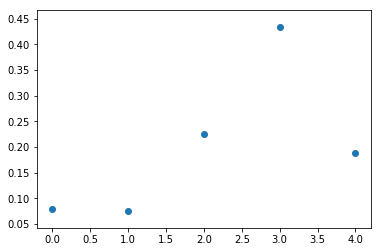

In [37]:
plt.scatter([range(5)],p)

In [31]:
# Quiz: Formal Definition Of Probability 1
p_x1=0.2
p_x2=1-p_x1
p_x2

0.8

In [32]:
# Quiz: Formal Definition Of Probability 2
p_x1=0
p_x2=1-p_x1
p_x2

1

In [218]:
# Quiz: Formal Definition Of Probability 3
1-4*0.1

0.6

In [222]:
# Quiz: Cancer Test
p_havecancer = 0.001
p_freecancer = 0.999
p_havepositive = 0.8
p_freepositive = 0.1
p_positive = p_havecancer*p_havepositive+p_freecancer*p_freepositive
p_positive

0.1007

In [223]:
 p_havecancer*p_havepositive/p_positive

0.007944389275074478

In [225]:
# Quiz: Coin Flip Quiz
0.5*0.5+0*0.5

0.25

In [226]:
# Quiz: Two Coin Quiz
0.5/(0.5+0.1)

0.8333333333333334

##   &#x1F916; &nbsp; <span style="color:red">Section 2. Problem Set 1</span>

In [230]:
# Quiz: Probability
p_x = 0.2
p_nox = 1-p_x
p_nox

0.8

In [231]:
p_y=0.2
p_xtheny = p_x*p_y
p_xtheny

0.04000000000000001

In [233]:
p_x_y = 0.6
p_nox_y = 0.6
p_y_ingeneral = p_x*p_x_y + p_nox*p_nox_y
p_y_ingeneral

0.6

In [234]:
# Quiz: Localization
# exponentially

In [239]:
# Quiz: Bayes' Rule
p=0.001
p_true=0.9
p_f = p*p_true
p_f

0.0009000000000000001

In [240]:
p_nof = (1-p)*(1-p_true)
p_nof

0.09989999999999997

In [241]:
p_f/(p_f+p_nof)

0.008928571428571432

In [242]:
p_nof/(p_f+p_nof)

0.9910714285714286

In [243]:
# Quiz: Localization Program

In [48]:
# The function localize takes the following arguments:
#
# colors:
#        2D list, each entry either 'R' (for red cell) or 'G' (for green cell)
#
# measurements:
#        list of measurements taken by the robot, each entry either 'R' or 'G'
#
# motions:
#        list of actions taken by the robot, each entry of the form [dy,dx],
#        where dx refers to the change in the x-direction (positive meaning
#        movement to the right) and dy refers to the change in the y-direction
#        (positive meaning movement downward)
#        NOTE: the *first* coordinate is change in y; the *second* coordinate is
#              change in x
#
# sensor_right:
#        float between 0 and 1, giving the probability that any given
#        measurement is correct; the probability that the measurement is
#        incorrect is 1-sensor_right
#
# p_move:
#        float between 0 and 1, giving the probability that any given movement
#        command takes place; the probability that the movement command fails
#        (and the robot remains still) is 1-p_move; the robot will NOT overshoot
#        its destination in this exercise
#
# The function should RETURN (not just show or print) a 2D list (of the same
# dimensions as colors) that gives the probabilities that the robot occupies
# each cell in the world.
#
# Compute the probabilities by assuming the robot initially has a uniform
# probability of being in any cell.
#
# Also assume that at each step, the robot:
# 1) first makes a movement,
# 2) then takes a measurement.
#
# Motion:
#  [0,0] - stay
#  [0,1] - right
#  [0,-1] - left
#  [1,0] - down
#  [-1,0] - up

def sense(p, Z, pHit, colors):
    pMiss = 1. - pHit
    q = [[0 for row in range(len(colors[0]))] for col in range(len(colors))]
    for i in range(len(colors[0])):
        for j in range(len(p)):
            hit = (Z == colors[j][i]) 
            q[j][i] = (p[j][i] * (hit * pHit + (1-hit) * pMiss))
    # s = sum(sum(el) for el in q)             
    s = sum(map(sum, q))
    for l in range(len(q[0])):
        for m in range(len(q)):
            q[m][l] = q[m][l] / s
    return q

def move(p, U, p_move, colors):
    p_here = 1. - p_move
    q = [[0 for row in range(len(colors[0]))] for col in range(len(colors))]
    for i in range(len(q[0])):
        for j in range(len(q)):
            s = p_move * p[(j-U[0]) % len(p)][(i-U[1]) % len(p[0])]
            q[j][i] = s + p_here * p[j][i]
    return q

def localize(colors, measurements, motions, sensor_right, p_move):
    # initializes p to a uniform distribution over a grid of the same dimensions as colors
    pinit = 1.0 / float(len(colors)) / float(len(colors[0]))
    p = [[pinit for row in range(len(colors[0]))] for col in range(len(colors))]
    
    # >>> Insert your code here <<<
    for i in range(len(measurements)):
        p = move(p, motions[i], p_move, colors)
        p = sense(p, measurements[i], sensor_right, colors)
    return p

def show(p):
    rows = ['[' + ','.join(map(lambda x: '{0:.5f}'.format(x),r)) + ']' for r in p]
    print ('[' + ',\n '.join(rows) + ']')
    
#############################################################
# For the following test case, your output should be 
# [[0.01105, 0.02464, 0.06799, 0.04472, 0.02465],
#  [0.00715, 0.01017, 0.08696, 0.07988, 0.00935],
#  [0.00739, 0.00894, 0.11272, 0.35350, 0.04065],
#  [0.00910, 0.00715, 0.01434, 0.04313, 0.03642]]
# (within a tolerance of +/- 0.001 for each entry)

colors = [['R','G','G','R','R'],
          ['R','R','G','R','R'],
          ['R','R','G','G','R'],
          ['R','R','R','R','R']]
measurements = ['G','G','G','G','G']
motions = [[0,0],[0,1],[1,0],[1,0],[0,1]]
p = localize(colors,measurements,motions,sensor_right = 0.7, p_move = 0.8)
show(p) # displays your answer


[[0.01106,0.02464,0.06800,0.04472,0.02465],
 [0.00715,0.01017,0.08697,0.07988,0.00935],
 [0.00740,0.00894,0.11273,0.35351,0.04066],
 [0.00911,0.00715,0.01435,0.04313,0.03643]]


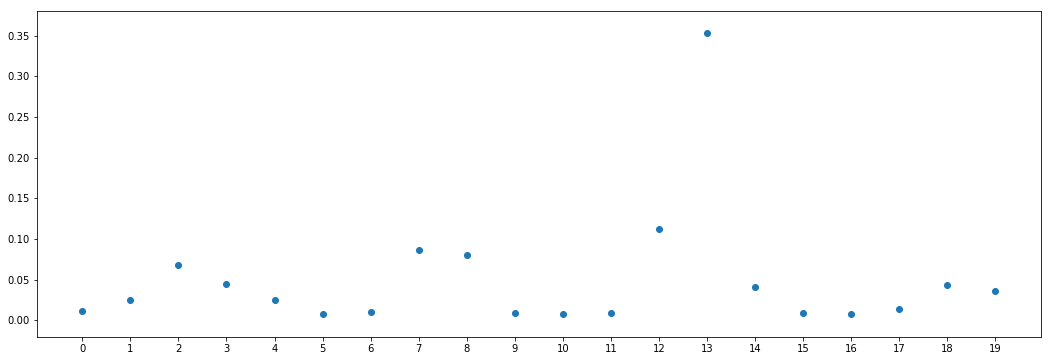

In [57]:
plt.figure(figsize=(18,6))
plt.scatter(range(20), p)
plt.xticks(np.arange(0, 20, 1));

In [21]:
# test 1
colors = [['G', 'G', 'G'],
          ['G', 'R', 'G'],
          ['G', 'G', 'G']]
measurements = ['R']
motions = [[0,0]]
sensor_right = 1.0
p_move = 1.0
p = localize(colors,measurements,motions,sensor_right,p_move)
# correct_answer = (
#     [[0.0, 0.0, 0.0],
#      [0.0, 1.0, 0.0],
#     [0.0, 0.0, 0.0]])
show(p)

[[0.00000,0.00000,0.00000],
 [0.00000,1.00000,0.00000],
 [0.00000,0.00000,0.00000]]


In [15]:
# test 2
colors = [['G', 'G', 'G'],
          ['G', 'R', 'R'],
          ['G', 'G', 'G']]
measurements = ['R']
motions = [[0,0]]
sensor_right = 1.0
p_move = 1.0
p = localize(colors,measurements,motions,sensor_right,p_move)
# correct_answer = (
#     [[0.0, 0.0, 0.0],
#      [0.0, 0.5, 0.5],
#      [0.0, 0.0, 0.0]])
show(p)

[[0.00000,0.00000,0.00000],
 [0.00000,0.50000,0.50000],
 [0.00000,0.00000,0.00000]]


In [16]:
# test 3
colors = [['G', 'G', 'G'],
          ['G', 'R', 'R'],
          ['G', 'G', 'G']]
measurements = ['R']
motions = [[0,0]]
sensor_right = 0.8
p_move = 1.0
p = localize(colors,measurements,motions,sensor_right,p_move)
# correct_answer = (
#     [[0.06666666666, 0.06666666666, 0.06666666666],
#      [0.06666666666, 0.26666666666, 0.26666666666],
#      [0.06666666666, 0.06666666666, 0.06666666666]])
show(p)

[[0.06667,0.06667,0.06667],
 [0.06667,0.26667,0.26667],
 [0.06667,0.06667,0.06667]]


In [17]:
# test 4
colors = [['G', 'G', 'G'],
          ['G', 'R', 'R'],
          ['G', 'G', 'G']]
measurements = ['R', 'R']
motions = [[0,0], [0,1]]
sensor_right = 0.8
p_move = 1.0
p = localize(colors,measurements,motions,sensor_right,p_move)
correct_answer = (
    [[0.03333333333, 0.03333333333, 0.03333333333],
     [0.13333333333, 0.13333333333, 0.53333333333],
     [0.03333333333, 0.03333333333, 0.03333333333]])
show(p)

[[0.03333,0.03333,0.03333],
 [0.13333,0.13333,0.53333],
 [0.03333,0.03333,0.03333]]


In [18]:
# test 5
colors = [['G', 'G', 'G'],
          ['G', 'R', 'R'],
          ['G', 'G', 'G']]
measurements = ['R', 'R']
motions = [[0,0], [0,1]]
sensor_right = 1.0
p_move = 1.0
p = localize(colors,measurements,motions,sensor_right,p_move)
correct_answer = (
    [[0.0, 0.0, 0.0],
     [0.0, 0.0, 1.0],
     [0.0, 0.0, 0.0]])
show(p)

[[0.00000,0.00000,0.00000],
 [0.00000,0.00000,1.00000],
 [0.00000,0.00000,0.00000]]


In [19]:
# test 6
colors = [['G', 'G', 'G'],
          ['G', 'R', 'R'],
          ['G', 'G', 'G']]
measurements = ['R', 'R']
motions = [[0,0], [0,1]]
sensor_right = 0.8
p_move = 0.5
p = localize(colors,measurements,motions,sensor_right,p_move)
correct_answer = (
    [[0.0289855072, 0.0289855072, 0.0289855072],
     [0.0724637681, 0.2898550724, 0.4637681159],
     [0.0289855072, 0.0289855072, 0.0289855072]])
show(p)

[[0.02899,0.02899,0.02899],
 [0.07246,0.28986,0.46377],
 [0.02899,0.02899,0.02899]]


In [10]:
# test 7
colors = [['G', 'G', 'G'],
          ['G', 'R', 'R'],
          ['G', 'G', 'G']]
measurements = ['R', 'R']
motions = [[0,0], [0,1]]
sensor_right = 1.0
p_move = 0.5
p = localize(colors,measurements,motions,sensor_right,p_move)
correct_answer = (
    [[0.0, 0.0, 0.0],
     [0.0, 0.33333333, 0.66666666],
     [0.0, 0.0, 0.0]])
show(p)

[[0.00000,0.00000,0.00000],
 [0.00000,0.33333,0.66667],
 [0.00000,0.00000,0.00000]]


In [44]:
q1 = [[0 for row in range(len(colors[0]))] for col in range(len(colors))]
q1

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [45]:
q2 = len(colors)*[len(colors[0])*[0]]
q2

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [46]:
q1==q2

True

In [47]:
def sense(p, Z, pHit, colors):
    pMiss = 1. - pHit
    q = len(colors)*[len(colors[0])*[0.]]
    for i in range(len(colors[0])):
        for j in range(len(p)):
            hit = (Z == colors[j][i]) 
            q[j][i] = (p[j][i] * (hit * pHit + (1-hit) * pMiss))
    # s = sum(sum(el) for el in q)             
    s = sum(map(sum, q))
    for l in range(len(q[0])):
        for m in range(len(q)):
            q[m][l] = q[m][l] / s
    return q

def move(p, U, p_move, colors):
    p_here = 1. - p_move
    q = len(colors)*[len(colors[0])*[0]]
    for i in range(len(q[0])):
        for j in range(len(q)):
            s = p_move * p[(j-U[0]) % len(p)][(i-U[1]) % len(p[0])]
            q[j][i] = s + p_here * p[j][i]
    return q

def localize(colors, measurements, motions, sensor_right, p_move):
    # initializes p to a uniform distribution over a grid of the same dimensions as colors
    pinit = 1.0 / float(len(colors)) / float(len(colors[0]))
    p = [[pinit for row in range(len(colors[0]))] for col in range(len(colors))]
    
    # >>> Insert your code here <<<
    for i in range(len(measurements)):
        p = move(p, motions[i], p_move, colors)
        p = sense(p, measurements[i], sensor_right, colors)
    return p

def show(p):
    rows = ['[' + ','.join(map(lambda x: '{0:.5f}'.format(x),r)) + ']' for r in p]
    print ('[' + ',\n '.join(rows) + ']')
    
#############################################################
# For the following test case, your output should be 
# [[0.01105, 0.02464, 0.06799, 0.04472, 0.02465],
#  [0.00715, 0.01017, 0.08696, 0.07988, 0.00935],
#  [0.00739, 0.00894, 0.11272, 0.35350, 0.04065],
#  [0.00910, 0.00715, 0.01434, 0.04313, 0.03642]]
# (within a tolerance of +/- 0.001 for each entry)

colors = [['R','G','G','R','R'],
          ['R','R','G','R','R'],
          ['R','R','G','G','R'],
          ['R','R','R','R','R']]
measurements = ['G','G','G','G','G']
motions = [[0,0],[0,1],[1,0],[1,0],[0,1]]
p = localize(colors,measurements,motions,sensor_right = 0.7, p_move = 0.8)
show(p) # displays your answer

[[24309744292185273971541487170261505163382307477189295676802857405223490166826249421953769144320.00000,24309744292185273971541487170261505163382307477189295676802857405223490166826249421953769144320.00000,24309744292185273971541487170261505163382307477189295676802857405223490166826249421953769144320.00000,24309744292185273971541487170261505163382307477189295676802857405223490166826249421953769144320.00000,24309744292185273971541487170261505163382307477189295676802857405223490166826249421953769144320.00000],
 [24309744292185273971541487170261505163382307477189295676802857405223490166826249421953769144320.00000,24309744292185273971541487170261505163382307477189295676802857405223490166826249421953769144320.00000,24309744292185273971541487170261505163382307477189295676802857405223490166826249421953769144320.00000,24309744292185273971541487170261505163382307477189295676802857405223490166826249421953769144320.00000,2430974429218527397154148717026150516338230747718929567680285740522349016682

##   &#x1F916; &nbsp; <span style="color:red">Section 3. Office Hours Week 1</span>